# ÔN THI CUỐI KỲ MÔN LT PTDL 1

Dương Hoàng Lan Anh_21087481

> Sử dụng bộ dữ liệu: California Housing Prices

Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Phần I: Khám phá dữ liệu

#### Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv('../data/housing.csv', header=0, delimiter=',', encoding='utf-8')

#### Hiển thị 5 dòng đầu tiên của dữ liệu

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Hiển thị 5 dòng cuối cùng của dữ liệu

In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


**Mô tả về dữ liệu:**

...

...

#### Xem thông tin của dữ liệu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Xem thống kê mô tả của dữ liệu

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Kiểm tra dữ liệu có bị thiếu hay không?

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Nhận xét:** Ở cột total_bedrooms có 207 giá trị bị thiếu   

#### Dùng heatmap để trực quan hóa dữ liệu bị thiếu. Cho biết dữ liệu ở cột nào bị thiếu.

<Axes: >

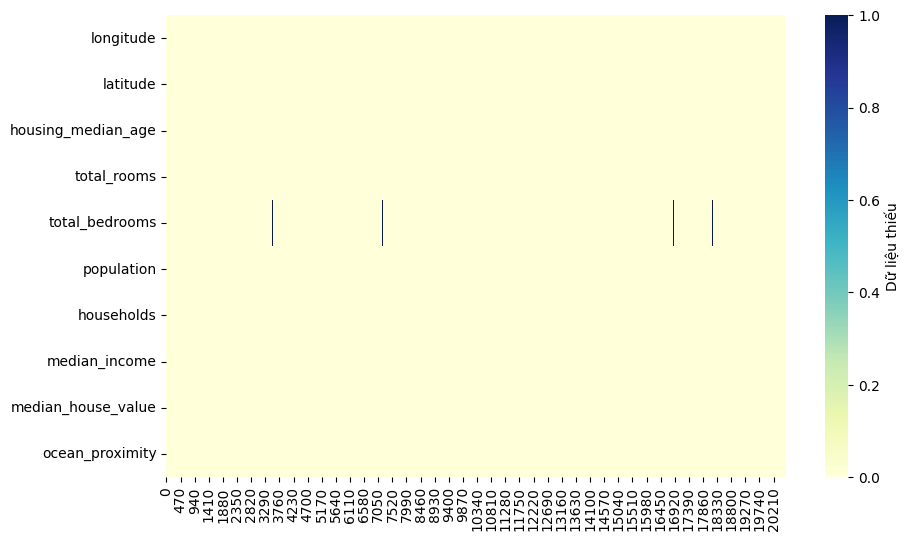

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',cbar_kws={'label':'Dữ liệu thiếu'})

**Nhận xét:** Dữ liệu bị thiếu ở cột total_bedrooms

## Phần II: Tiền xử lý dữ liệu

Chúng ta sẽ xử lý những dữ liệu bị thiếu ở cột total_bedrooms

In [9]:
# Lấy giá trị trung bình ở cột total_bedrooms
total_bedrooms_mean_value = df["total_bedrooms"].mean()

In [10]:
# Thay thế giá trị thiếu bằng giá trị trung bình ở cột total_bedrooms
df["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace=True)

In [11]:
# Kiểm tra dữ liệu thiếu
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Lấy giá trị trung bình ở các cột trong bộ dữ liệu

In [12]:
column_count = 0
for i in df.columns:
    print(f"The mean of {i} is {df[i].mean()}")
    column_count += 1
    if column_count == 9:
        break

The mean of longitude is -119.56970445736432
The mean of latitude is 35.63186143410853
The mean of housing_median_age is 28.639486434108527
The mean of total_rooms is 2635.7630813953488
The mean of total_bedrooms is 537.8705525375617
The mean of population is 1425.4767441860465
The mean of households is 499.5396802325581
The mean of median_income is 3.8706710029069766
The mean of median_house_value is 206855.81690891474


#### Hiển thị kiểu dữ liệu của từng cột

In [13]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Minh họa histogram của từng cột dữ liệu

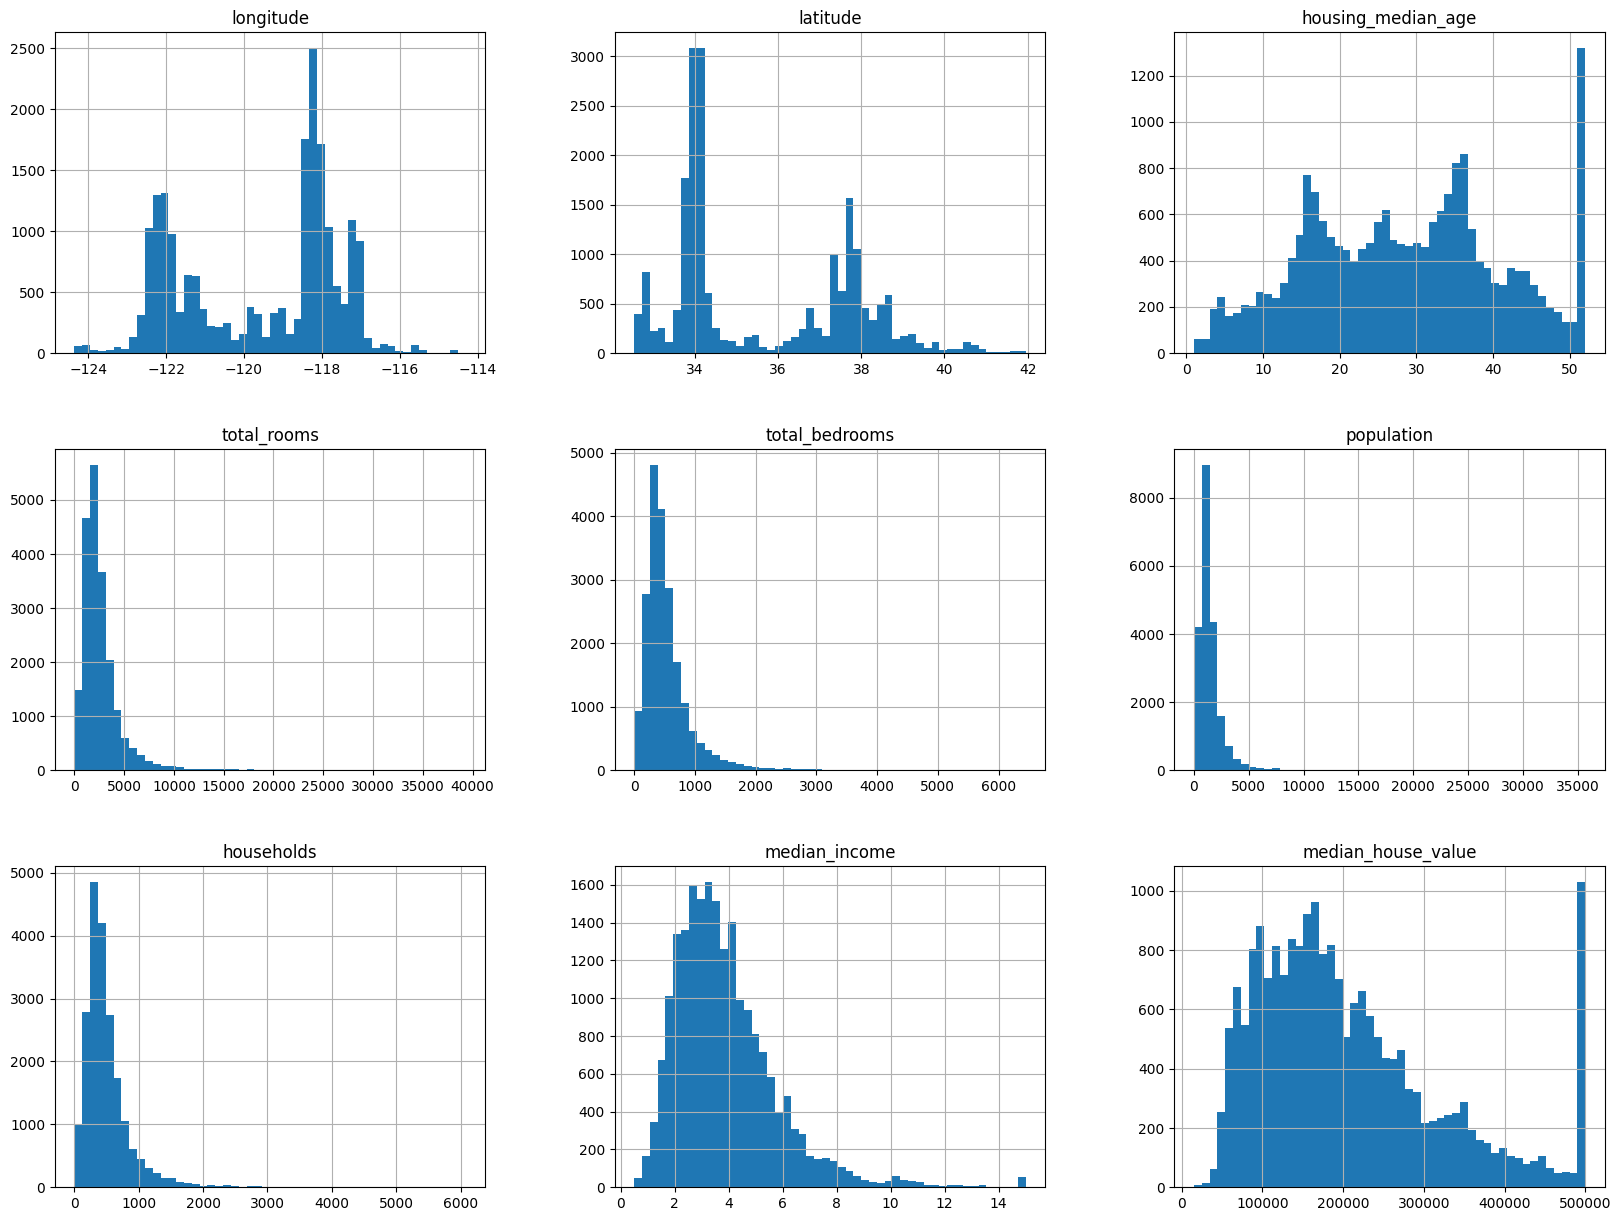

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Nhận xét:**

* Dựa vào các đồ thị của longtitude (kinh độ) và latitude (vĩ độ), ta thấy rằng có hai khu vực địa lý tập trung nhiều điểm dữ liệu. Khả năng đây là hai khu thành phố lớn với nhiều đô thị vệ tinh. Một chút hiểu biết về California cho phép ta dự đoán rằng đây là khu vực gần San Francisco và Los Angeles.

* Cột housing_median_age và median_house_value có bin cuối cùng cao hơn các bin gần đó, chứng tỏ có khả năng các giá trị bị cắt ngọn (clip) tại các giá trị đó. Tức là các giá trị lớn hơn được chuyển thành giá trị tại điểm bị cắt.

* Các cột total_rooms, total_bedroooms, population, households có hầu hết giá trị tập trung ở các bin đầu tiên, phần các bin sau rất dài nhưng có ít giá trị. Phân phối dữ liệu mà dữ liệu tập trung về một phía được gọi là “đuôi dài” (long tail) hay lệch (skewed). Các phân phối trong trường hợp này đều ở dạng lệch phải (right-skewed distribution). Ở đây lệch phải là ý nói đến phần “đuôi dài” của histogram, không phải phần mà dữ liệu chủ yếu thuộc về. Với những trường dữ liệu này, kỹ thuật cắt ngọn tại một giá trị khả dĩ thường được dùng giống như cách dữ liệu được tạo ở housing_median_age và median_house_value.

## Phần III: Trực quan hóa dữ liệu

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


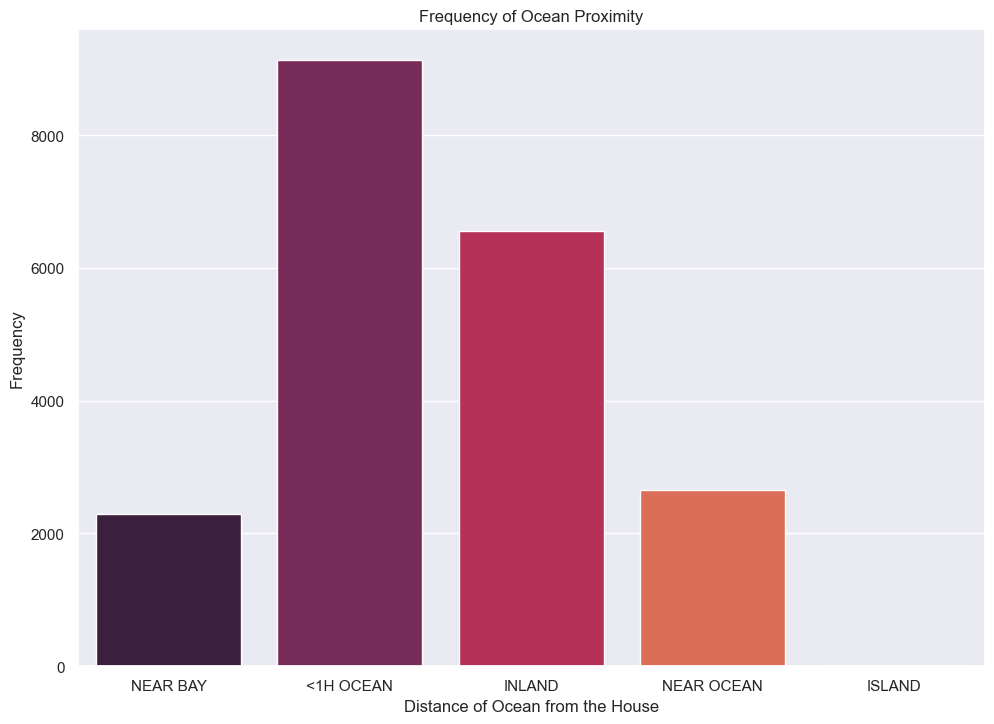

In [15]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.countplot(data=df, x="ocean_proximity",  palette="rocket").set(
    title = "Frequency of Ocean Proximity",
    xlabel = "Distance of Ocean from the House",
    ylabel = "Frequency"
)
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


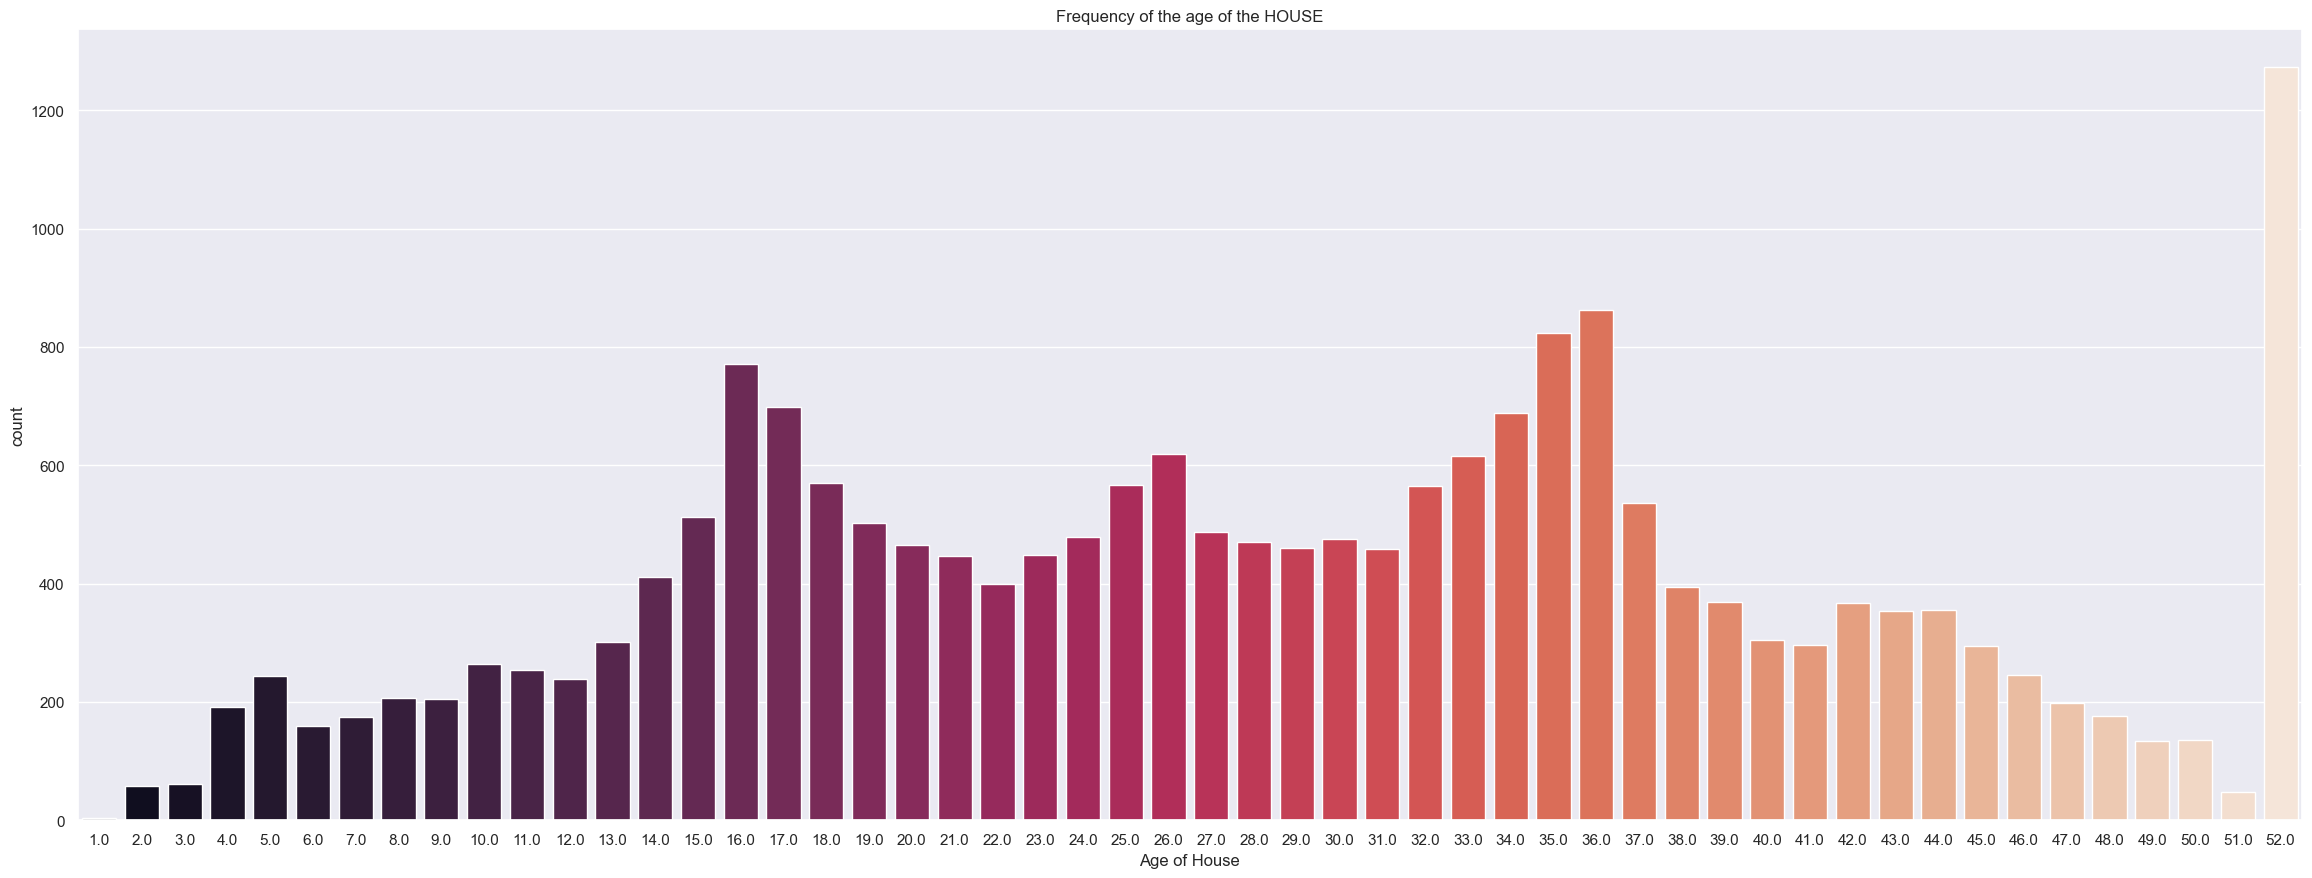

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize':(28.7,10.27)})

sns.countplot(data=df, x="housing_median_age",  palette="rocket").set(
    title = "Frequency of the age of the HOUSE",
    xlabel = "Age of House"
)

plt.show()

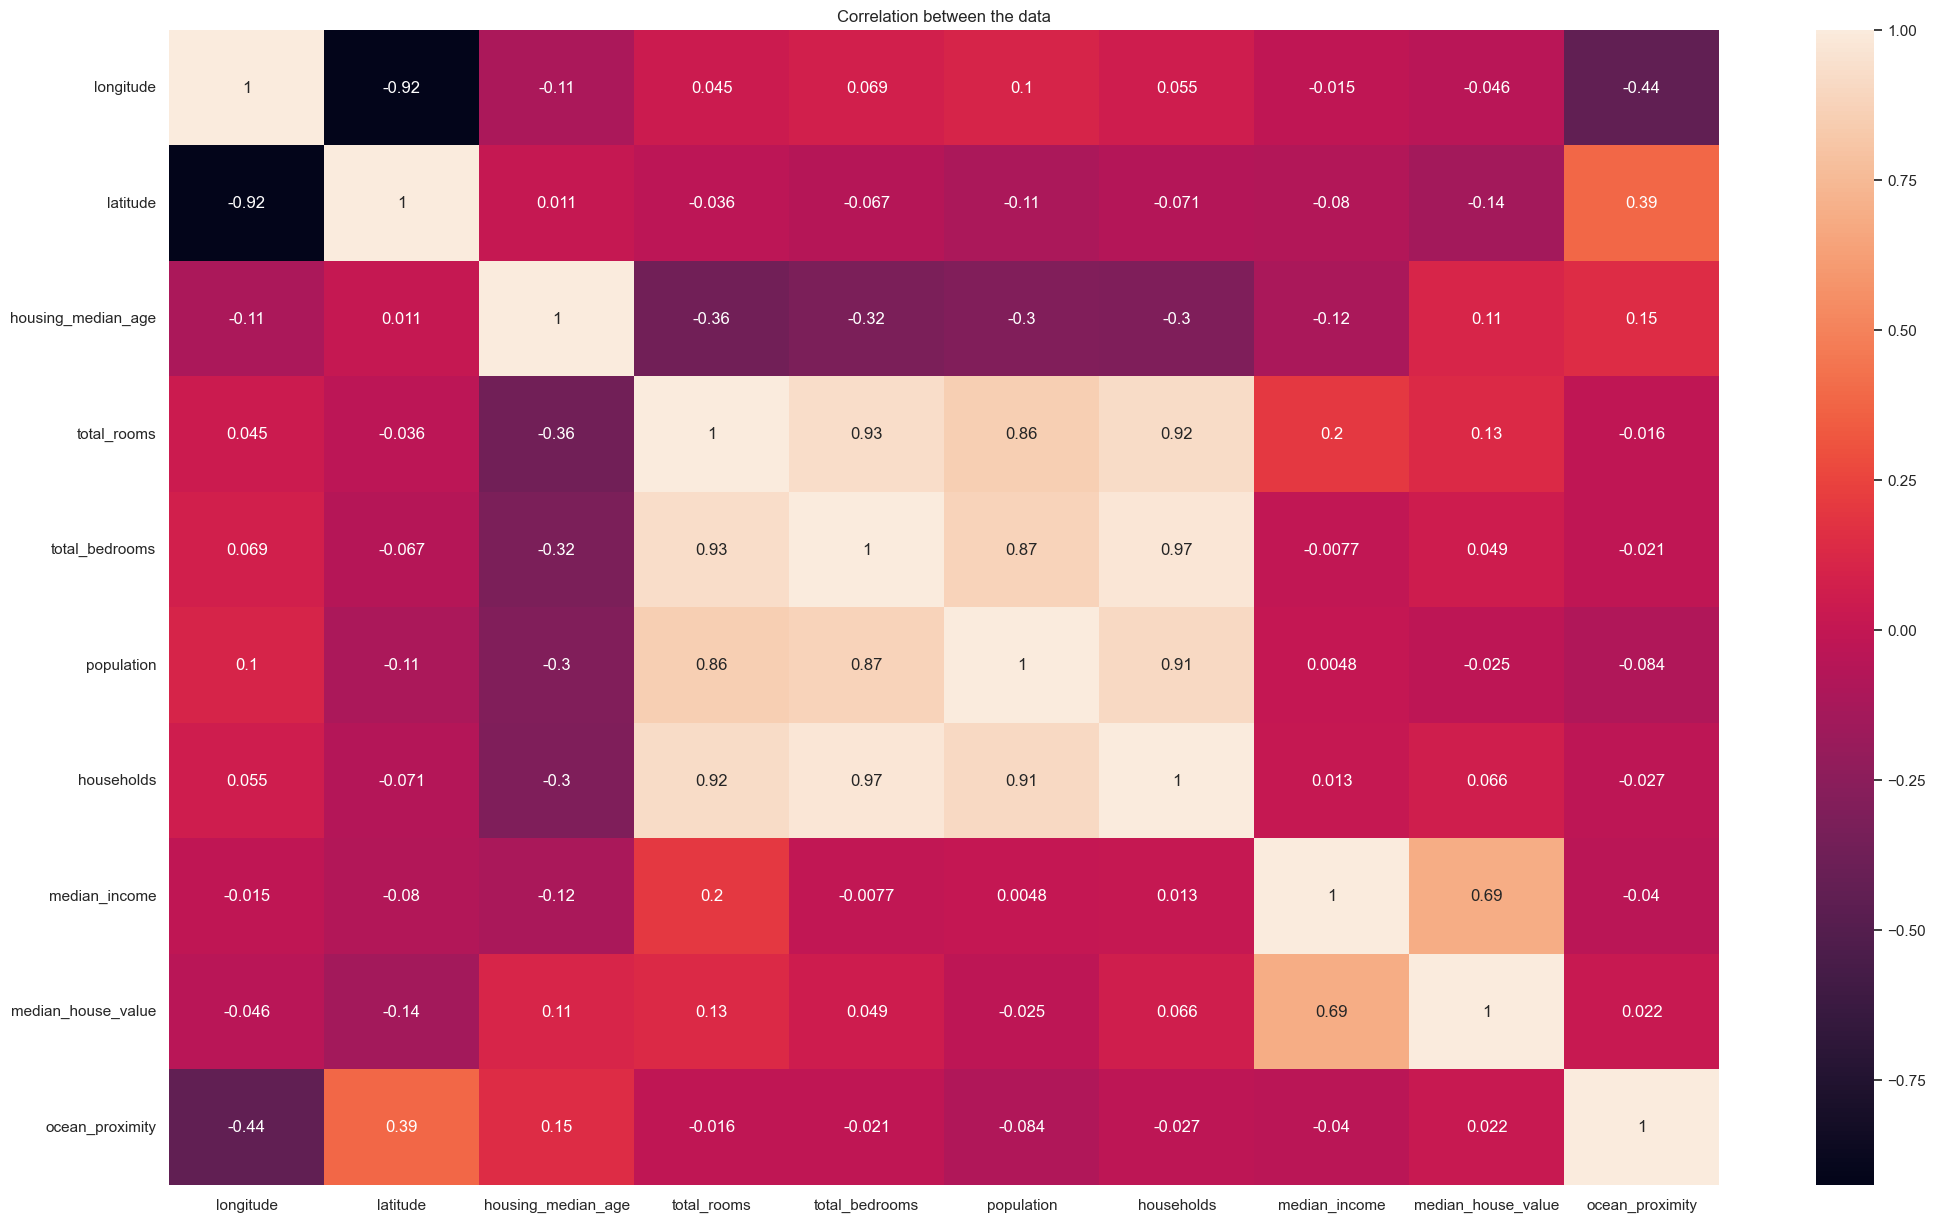

In [17]:
# Convert 'ocean_proximity' to numerical values
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4})

# Heatmap for observing correlations
plt.figure(figsize=(25,15))
california_heatmap = df.corr()

# Plot
sns.heatmap(california_heatmap, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()

## Phần IV: Các bài toán về kiểm định

#### 1. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp Z-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

Với One Sample Z-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0